<a href="https://colab.research.google.com/github/MountainFishCheng/MountainFishCheng/blob/main/ML00202_%E4%BC%B0%E7%AE%97%E9%9B%86%E7%BE%A4%E6%95%B8%E9%87%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import numpy as np
# # TODO

# input_file = ('data_perf.txt')
# # Load data 載入資料
# # TODO




# # Find the best epsilon
# eps_grid = np.linspace(            )
# silhouette_scores = []
# # TODO

#     # Train DBSCAN clustering model 訓練DBSCAN分群模型
#     # ################
#     # min_samples = 5
#     # ################


#     # Extract labels 提取標籤


#     # Extract performance metric 提取性能指標



#     print("Epsilon:", eps, " --> silhouette score:", silhouette_score)

#     # TODO



# # Best params
# print("Best epsilon ="           )

# # Associated model and labels for best epsilon
# model =   # TODO
# labels =  # TODO

# # Check for unassigned datapoints in the labels
# # TODO


# # Number of clusters in the data
# # TODO
# print("Estimated number of clusters ="           )

# # Extracts the core samples from the trained model
# # TODO


**TODO**


*   DBSCAN群聚演算法


*   data_perf.txt
*   data_perf_add.txt





In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


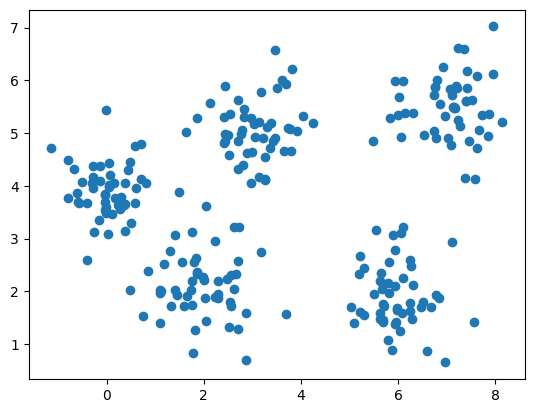

data shpae:
 (250, 2)


In [2]:
# Load data 載入資料
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TQC+/data/data_perf.txt',header=None)
X = data
import matplotlib.pyplot as plt

plt.scatter(X[0],X[1])
plt.show()

print("data shpae:\n", X.shape)

In [3]:
# Find the best epsilon
eps_grid = np.linspace(0.3, 1.2, num=10) #設定0.3~1.2的eps值
silhouette_scores = [] # 用來儲存不同 epsilon 的分數
# TODO

    # Train DBSCAN clustering model 訓練DBSCAN分群模型
    # ################
    # min_samples = 5
    # ################

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

best_eps = None
best_silhouette_score = float('-inf')
best_model = None
best_labels = None

for eps in eps_grid:
  model = DBSCAN(eps=eps, min_samples=5).fit(X)  # 訓練 DBSCAN 模型
  labels = model.labels_ # 提取標籤

  # 確保至少有兩個群集（不然 silhouette_score 會報錯）
  unique_labels = set(labels)-{-1} # noise(離群值)在labels會被標示-1
  #unique_labels = np.unique(labels[labels != -1])  # 過濾掉 -1
  if len(unique_labels) > 1:
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f'Epsilon:{eps:.2f} --> silhouette score:{score:.4f}')
    if score > best_silhouette_score:
      best_silhouette_score = score
      best_eps = eps
      best_model = model
      best_labels = labels

  else:
    silhouette_scores.append(None)  # 如果無法計算 silhouette score，則存 None

# TODO

# Best params
# 輸出最佳參數
print("Best epsilon =", f"{best_eps:.3f}")  # 小數點第四位無條件捨去
print("Best silhouette score =", f"{best_silhouette_score:.4f}")  # 四捨五入取至小數點後四位

# 計算最佳群集數量（不含雜訊）
if best_labels is not None:
    estimated_clusters = len(set(best_labels) - {-1})  # 移除雜訊
    print("Estimated number of clusters:", estimated_clusters)
else:
    print("No valid clusters found.")



Epsilon:0.30 --> silhouette score:0.1287
Epsilon:0.40 --> silhouette score:0.3594
Epsilon:0.50 --> silhouette score:0.5134
Epsilon:0.60 --> silhouette score:0.6165
Epsilon:0.70 --> silhouette score:0.6322
Epsilon:0.80 --> silhouette score:0.6366
Epsilon:0.90 --> silhouette score:0.5142
Epsilon:1.00 --> silhouette score:0.5629
Epsilon:1.10 --> silhouette score:0.5629
Epsilon:1.20 --> silhouette score:0.5629
Best epsilon = 0.800
Best silhouette score = 0.6366
Estimated number of clusters: 5


Mounted at /content/drive/


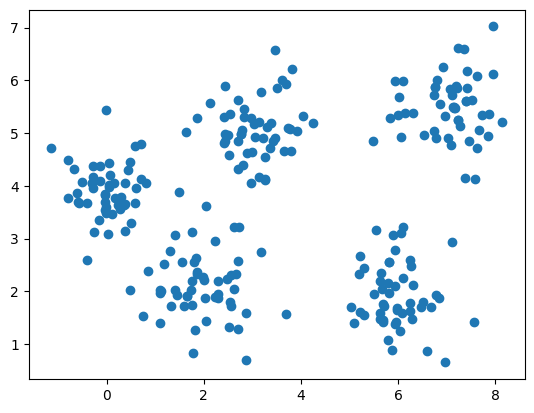

(255, 2)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')



# Load data 載入資料 data_perf_add.txt
X1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TQC+/data/data_perf_add.txt',header=None)

plt.scatter(X1[0],X1[1])
plt.show()

print(X1.shape)

In [6]:
eps_grid1 = np.linspace(0.3, 1.2, num=10)



for eps in eps_grid1:
  model1 = DBSCAN(eps=eps, min_samples=5).fit(X1)
  scores = silhouette_score(X1, model1.labels_)

  print(f"eps:{eps:.1f} --> silhouette_score:{scores:.4f} --> Estimated number of clusters:{len(set(model1.labels_)-{1})}")


eps:0.3 --> silhouette_score:0.1520 --> Estimated number of clusters:5
eps:0.4 --> silhouette_score:0.3631 --> Estimated number of clusters:7
eps:0.5 --> silhouette_score:0.5188 --> Estimated number of clusters:6
eps:0.6 --> silhouette_score:0.6205 --> Estimated number of clusters:5
eps:0.7 --> silhouette_score:0.6358 --> Estimated number of clusters:5
eps:0.8 --> silhouette_score:0.6401 --> Estimated number of clusters:5
eps:0.9 --> silhouette_score:0.5155 --> Estimated number of clusters:3
eps:1.0 --> silhouette_score:0.5641 --> Estimated number of clusters:2
eps:1.1 --> silhouette_score:0.5641 --> Estimated number of clusters:2
eps:1.2 --> silhouette_score:0.5641 --> Estimated number of clusters:2
